# K Means Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib notebook

In [2]:
def load_data(filename):
    """
    Read data from the text file and return it as numpy array
    """
    return np.loadtxt(filename)

In [3]:
def euclidian_dist(a,b):
    return np.linalg.norm(a-b)

In [4]:
def k_means(dataset, k =2):
    history_centroid = []
    
    num_instances, num_features = dataset.shape
    
    centroids = dataset[np.random.randint(0, num_instances-1, size=k)]
    
    history_centroid.append(centroids)
    centroids_old = np.zeros(centroids.shape)
    
#     print(centroids, centroids_old)
    
    belongs_to = np.zeros((num_instances,1))
    norm = euclidian_dist(centroids, centroids_old)
    
#     itr = 0
    
    prev_norm = 0;
    norm_count = 0;
    
    while (1):
#         itr += 1
#         print(itr)
        norm = euclidian_dist(centroids, centroids_old)
#         print("norm : ", norm)
        
        # Calulate the distance of each instance of data wrt current centroids
        for index_instance, instance in enumerate(dataset):
#             print('instance : ', instance)
            dist_vec = np.zeros((k,1))
            
            # Calculate the distance of each point wrt to all the centroid
            for index_centroid, centroid in enumerate(centroids):
                dist_vec[index_centroid,0] = euclidian_dist(instance, centroid)
#                 print(dist_vec[index_centroid, 0])
            
            # returns the index of centroid with the min value
            belongs_to[index_instance,0] = np.argmin(dist_vec)
            
        tmp_centroids = np.zeros((k, num_features))
        
        for index in range(len(centroids)):
            instance_dist_index = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            tmp_centroids[index, : ] = np.mean(dataset[instance_dist_index], axis = 0)
            
        centroids = tmp_centroids
        
        history_centroid.append(centroids)
        
        #Check for continuously repeating centroids
        if (prev_norm == norm):
            norm_count += 1
        else:
            prev_norm = norm
        
        # If centroids do not change for 10 iterations, break
        if norm_count == 10:
            break
        
        
    return centroids, history_centroid, belongs_to

### Enter the parameters here

In [5]:
#number of centroids
k = 10
filename = "flame.txt"
dataset = load_data(filename)

In [6]:
dataset.shape

(240, 3)

In [7]:
centroid, history_centroid , belongs_to = k_means(dataset, k)

In [8]:
centroid

array([[  4.55789474,  25.00526316,   1.        ],
       [  1.75      ,  21.565     ,   2.        ],
       [  9.20277778,  24.99444444,   1.        ],
       [  7.10652174,  25.92173913,   1.        ],
       [  6.33518519,  17.13518519,   2.        ],
       [  3.89230769,  18.69230769,   2.        ],
       [  8.26904762,  15.92857143,   2.        ],
       [  7.1862069 ,  22.10862069,   1.10344828],
       [ 10.27      ,  18.595     ,   1.96666667],
       [ 12.76296296,  21.78518519,   2.        ]])

<IPython.core.display.Javascript object>


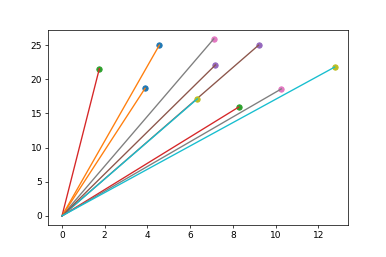

In [9]:
for i in range(len(centroid)):
    plt.plot(centroid[i][0], centroid[i][1],'o')
    plt.plot([centroid[i][0],0], [centroid[i][1],0])

In [10]:
belongs_to

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
      

In [11]:
np.random.rand(7)

array([ 0.73614775,  0.7357479 ,  0.78771867,  0.70477989,  0.78942476,
        0.68556856,  0.61129911])

In [12]:
def plot(k,centroids, belongs_to, dataset):
    plt.figure(figsize=(15,15))
    
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    
#     for index, centroid in enumerate(centroids):
#         plt.plot(centroid[0], centroid[1],'s', color = colors[index])
        
    for index in range(k):
        X = []
        Y = []
        instance_closer = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
#         color = np.random.rand(k)
        
        for instance_index in instance_closer:
#             print(instance_index)
#             plt.plot(dataset[instance_index][0], dataset[instance_index][1], colors[index] + 'o')
            plt.plot([dataset[instance_index][0], centroids[index][0]],\
                     [dataset[instance_index][1], centroids[index][1]], linewidth = 1,color = colors[index], marker = 'o')
#             X.append(dataset[instance_index][0])
#             Y.append(dataset[instance_index][1])
#         plt.scatter(X,Y,color = colors[index])
    for index, centroid in enumerate(centroids):
        plt.plot(centroid[0], centroid[1],'^k')
#     plt.legend(loc='best')

<IPython.core.display.Javascript object>


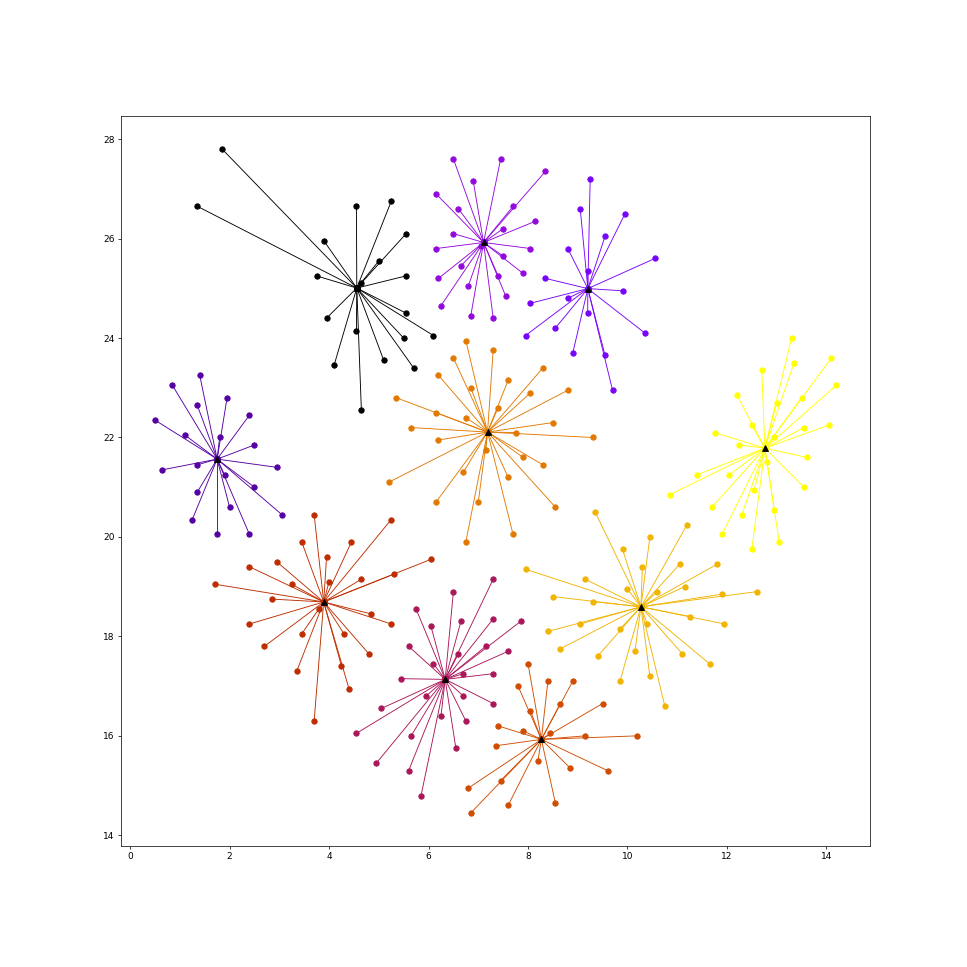

In [13]:
plot(k, centroid, belongs_to, dataset)

In [14]:
def plot_3d(k, centroids, belongs_to, dataset):
    fig = plt.figure(figsize= (12,12))
    ax = fig.add_subplot(111, projection='3d')
    
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
#     ax.set_xlim(0,30)
#     ax.set_ylim(0,30)
#     ax.set_zlim(0.75,2)
    
    
    
    for index in range(k):
        instance_closer = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
#         color = np.random.rand(k)
        
        for instance_index in instance_closer:
#             print(instance_index)
#             plt.plot(dataset[instance_index][0], dataset[instance_index][1], colors[index] + 'o')
            ax.plot([dataset[instance_index][0], centroids[index][0]],\
                     [dataset[instance_index][1], centroids[index][1]], \
                     [dataset[instance_index][2], centroids[index][2]], '-o', linewidth = 1, color = colors[index])

<IPython.core.display.Javascript object>


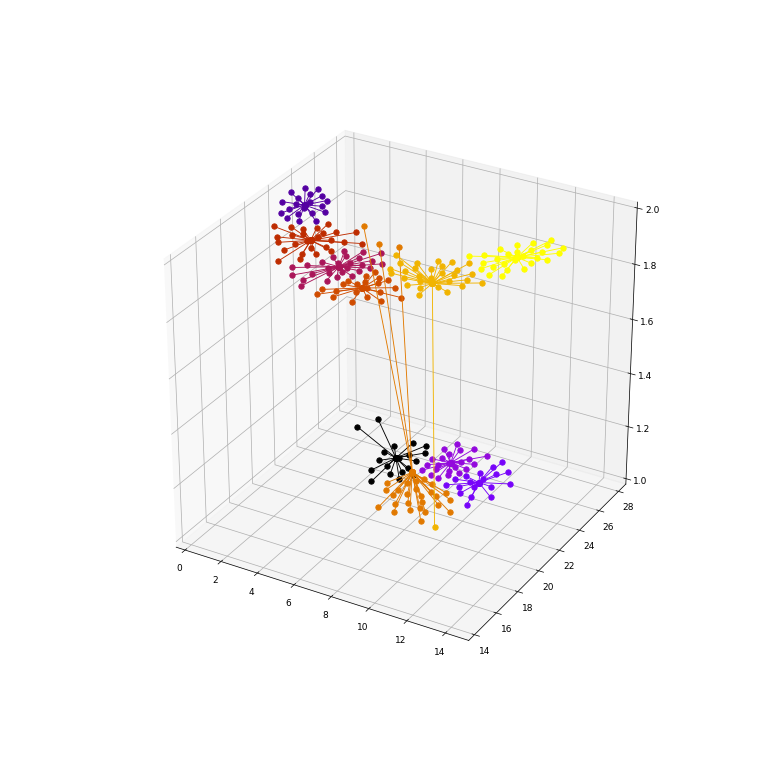

In [15]:
plot_3d(k, centroid, belongs_to, dataset)